---

## 05 - Fourier's Theorem
In this notebook, we will investigate Fourier's Theorem and the Complex Fourier Series. We will begin by investigating a sum of sine and cosine waves to approximate a square wave. Then, we will define a function for generating the Fourier Series for any real arbitrary waveform. This function will be used to determine the Fourier Series of a sawtooth wave. Euler's formula will also be introduced and a function for a Complex Fourier Series will be defined. Lastly, we will explore a simple example of obtaining the Complex Fourier Series coefficients for an arbitrary waveform. 

## Table of Contents
* [1. Introduction](#introduction)
* [2. A Sum of Sine and Cosine Waves](#a_sum_of_sine_and_cosine_waves)
* [3. Defining a Fourier Series Function](#defining_a_fourier_series_function)
* [4. Euler's Formula](#eulers_formula)
* [5. The Complex Fourier Series](#complex_fourier_series)

    
## References
* [1] - [J. Fourier, “Théorie analytique de la chaleur,” (in French) Paris: Firmin Didot Père et Fils, 1822.](https://archive.org/details/bub_gb_TDQJAAAAIAAJ)
* [2] - [E. Hewitt and R. E. Hewitt, “The Gibbs-Wilbraham Phenomenon: An Episode in Fourier Analysis,” Archive for History of Exact Sciences, Vol. 21, 1979, pp. 129-160.](http://doi.org//10.1007/BF00330404)

---

## 1. Introduction <a class="anchor" id="introduction"></a>
Joseph Fourier presented the process for decomposing a wave into a set of harmonically related periodic waveforms in his book titled La Théorie Analitique de la Chaleur [1]. This decomposition is known as a Fourier Series. Any arbitrary periodic waveform of fundamental period $T$ can be decomposed into a sum of sine and cosine waves of varying amplitudes and harmonically related frequencies. The following code cells will demonstrate how to obtain the Fourier Series of any arbitrary waveform. By the end of this notebook, you will have a greater understanding of practical Fourier Series analysis.

## 2. A Sum of Sine and Cosine Waves <a class="anchor" id="a_sum_of_sine_and_cosine_waves"></a>
The Fourier Series of a periodic waveform is defined as

$$
g(x) = a_0 + \sum_{n=1}^{\infty} a_n \cos{(nx)} + \sum_{n=1}^{\infty} b_n \sin{(nx)}.
$$

Let us begin our investigation by obtaining the Fourier Series of a square wave. Start by importing the required libraries.

In [1]:
from scipy import signal, integrate
import matplotlib.pyplot as plt
import numpy as np

Now, define a function for a square wave and plot it for inspection. The square wave will be characterised by the following:
* sample frequency $f_s$ of 1kHz,
* a fundamental period $T$ of 2$\pi$,
* an amplitude of 3,
* a DC bias of +3.

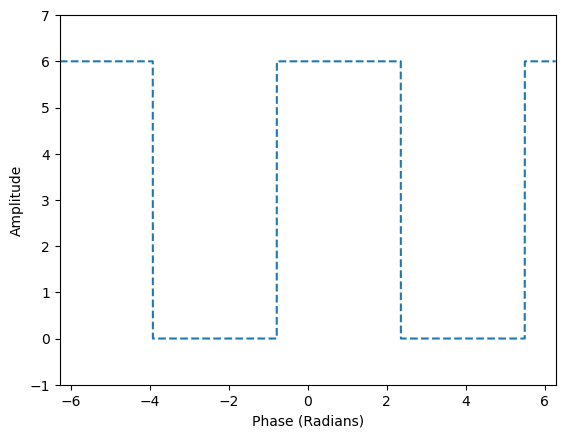

In [2]:
def squarewave(x, amplitude=3, dcbias=3, phase=np.pi/4):
    return signal.square(x+phase)*amplitude+dcbias

fs = 1e3
x = np.arange(-2*np.pi, 2*np.pi, 1/fs)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

The first Fourier Series coefficient, denoted as $a_0$, is the DC bias of a periodic waveform and is calculated using

$$
a_0 = \frac{1}{2\pi}\int\limits_{-\pi}^\pi g(x) \,dx.
$$

We can leverage the scipy `integrate.quad` function to compute $a_0$ across the periodic interval $[-\pi, \pi]$ and obtain the DC bias of the square wave.

In [3]:
a0 = integrate.quad(squarewave, -np.pi, np.pi)[0]/(2*np.pi)
print('The DC bias is ' + str(a0) + '.')

The DC bias is 3.0.


The cosine and sine Fourier Series coefficients are denoted as $a_n$ and $b_n$, respectively, where $n=1,2,3, ...$ The cosine coefficients are defined as

$$
a_n = \frac{1}{\pi}\int\limits_{-\pi}^\pi g(x)\cos{(nx)} \,dx.
$$

The sine coefficients are computed using

$$
b_n = \frac{1}{\pi}\int\limits_{-\pi}^\pi g(x)\sin{(nx)} \,dx.
$$

We can define functions for each of the terms inside the integrals of the above equations. Then, integrate the functions over the interval $[-\pi, \pi]$ to obtain the first Fourier Series coefficients for the cosine and sine waves, which are denoted as $a_1$ and $b_1$.

In [4]:
def gcos(x, g, n):
    return g(x)*np.cos(n*x)

def gsin(x, g, n):
    return g(x)*np.sin(n*x)

g = squarewave
n = 1
a1 = integrate.quad(gcos, -np.pi, np.pi, args=(g, n))[0]/(np.pi)
b1 = integrate.quad(gsin, -np.pi, np.pi, args=(g, n))[0]/(np.pi)

The DC bias, cosine wave, and sine wave can be summed together as below. The result is then plotted alongside the square wave for inspection. We can clearly see a waveform that approximately matches the amplitude and periodicity of the square wave.

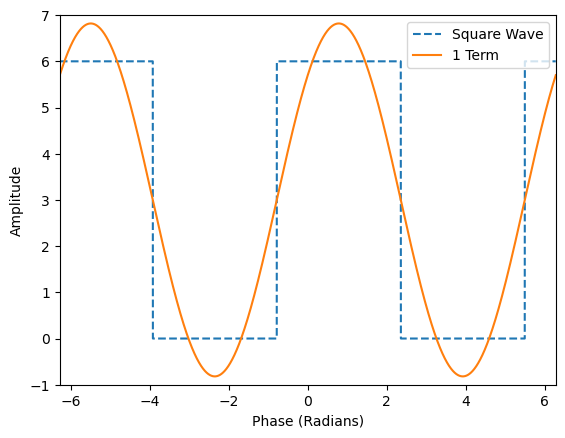

In [5]:
s1 = a0 + a1*np.cos(n*x) + b1*np.sin(n*x)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s1, label='1 Term')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

To obtain a better approximation, we can increase the number of Fourier Series terms that are summed together to 3.

In [6]:
n = 3
a3 = integrate.quad(gcos, -np.pi, np.pi, args=(g, n))[0]/np.pi
b3 = integrate.quad(gsin, -np.pi, np.pi, args=(g, n))[0]/np.pi

Plotting the summation of 3 terms improves our square wave approximation, as given below.

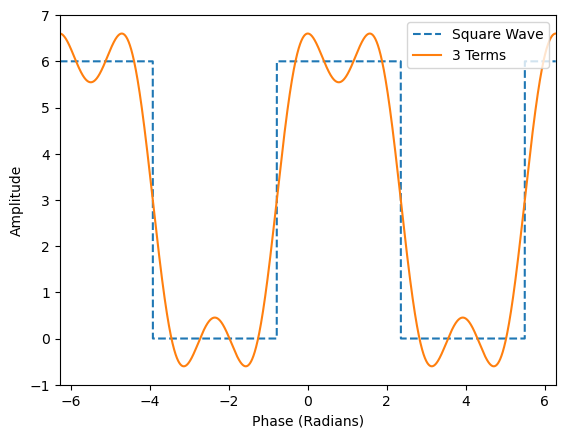

In [7]:
s3 = s1 + a3*np.cos(n*x) + b3*np.sin(n*x)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s3, label='3 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

A function can be defined to increase the number of Fourier Series terms that we sum across. We create this function in the following section.

## 3. Defining a Fourier Series Function <a class="anchor" id="defining_a_fourier_series_function"></a>
We can define a function to compute the Fourier Series coefficients for any number of terms and across any periodic interval. This function will compute the Fourier Series for any arbitrary real valued waveform and is given below.

In [8]:
def fourier_coeffs(x, g, n, a=-np.pi, b=np.pi):
    an, bn = np.zeros(n), np.zeros(n)
    a0 = integrate.quad(g, a, b)[0]/(b-a)
    for i in range(1, n + 1):
        an[i-1] = integrate.quad(gcos, a, b, args=(g, i))[0]*2/(b-a)
        bn[i-1] = integrate.quad(gsin, a, b, args=(g, i))[0]*2/(b-a)
    return a0, an, bn

Once we have calculated the Fourier Series coefficients, we can sum them together to produce the Fourier Series approximation of the waveform. We can define another function to perform the summation as follows.

In [9]:
def fourier_sum(x, a0, an, bn, n=None):
    if n == None or n > len(an):
        n = len(an)
    s = np.ones(len(x))*a0
    for i in range(1, n + 1):
        s += an[i-1]*np.cos(i*x) + bn[i-1]*np.sin(i*x)
    return s

The functions can now be used to obtain the Fourier Series of the square wave for any number of terms. Let us begin by computing the first 26 Fourier Series coefficients using the `fourier_coeffs` function.

In [10]:
a0, an, bn = fourier_coeffs(x, squarewave, n=26)

Now, we can compute the sum of the first 13 terms and plot the result as given below.

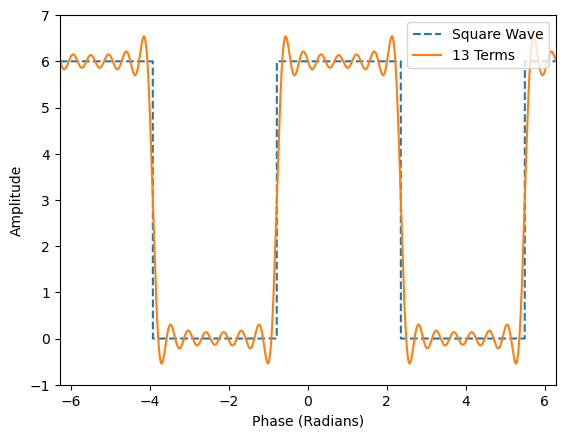

In [11]:
s = fourier_sum(x, a0, an, bn, n=13)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s, label='13 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

To improve the approximation, we can sum all 26 terms of the Fourier Series expansion. Notice that the resulting waveform is closely resembling the square wave. The ringing near the square wave transitions is known as Gibbs Phenomenon, which can be investigated further in [2].

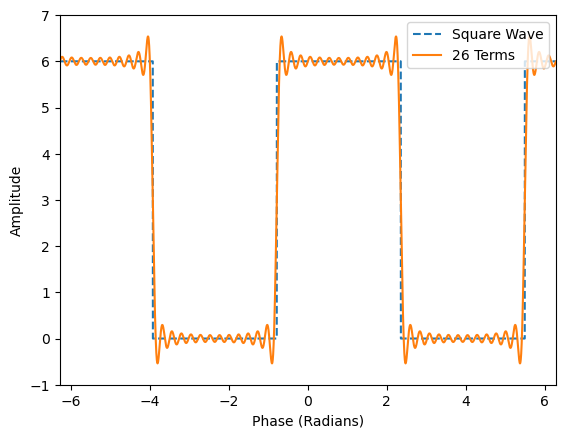

In [12]:
s = fourier_sum(x, a0, an, bn, n=26)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s, label='26 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

These functions can also be used to obtain the Fourier Series of other waveforms, such as a sawtooth wave. Firstly, let us define a function for a sawtooth waveform, as follows.

In [13]:
def sawtoothwave(x, amplitude=0.5, dcbias=0.5, phase=np.pi):
    return signal.sawtooth(x+phase)*amplitude+dcbias

Now we can create a sawtooth waveform that features the following properties:
* sample frequency $f_s$ of 1kHz,
* a fundamental period $T$ of 1 across the interval [0, 1] in seconds,
* an amplitude of 0.5,
* a DC bias of +0.5.

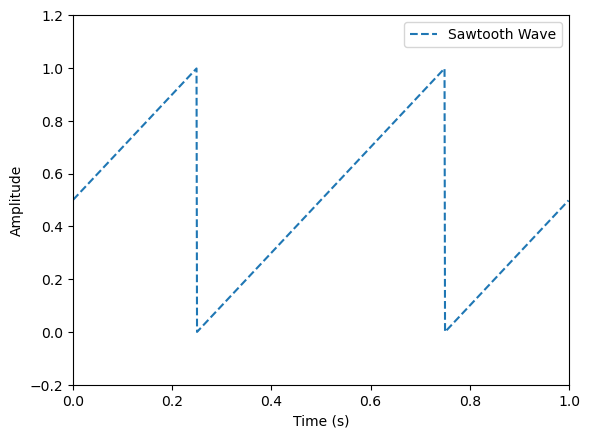

In [14]:
fs = 1e3
T = 1/2
ts = np.arange(0, 1, 1/fs)
x = 2*np.pi*ts/T
plt.plot(ts, sawtoothwave(x), label='Sawtooth Wave', linestyle='dashed')
plt.ylim([-0.2, 1.2])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

We can use the `fourier_coeffs` function to compute the first 5 terms of the fourier series expansion. Also, the `fourier_sum` function can be used to obtain the sum after computing each term. We can plot the summations on the same graph as below.

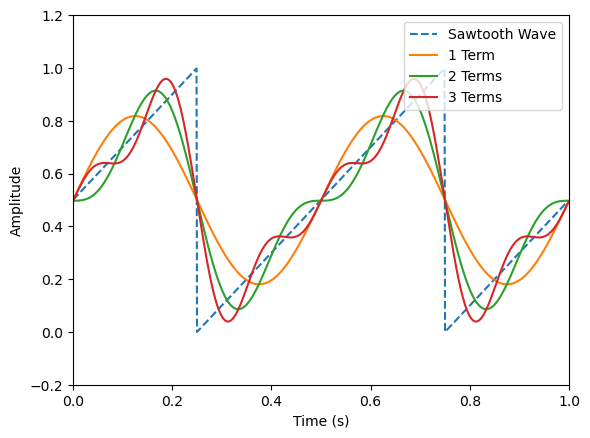

In [15]:
a0, an, bn = fourier_coeffs(x, sawtoothwave, n=5, a=x[0], b=x[-1])
s1 = fourier_sum(x, a0, an, bn, n=1)
s2 = fourier_sum(x, a0, an, bn, n=2)
s3 = fourier_sum(x, a0, an, bn, n=3)
plt.plot(ts, sawtoothwave(x), label='Sawtooth Wave', linestyle='dashed')
plt.plot(ts, s1, label='1 Term')
plt.plot(ts, s2, label='2 Terms')
plt.plot(ts, s3, label='3 Terms')
plt.ylim([-0.2, 1.2])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In this section, we have obtained the Fourier Series of a square and sawtooth waveforms. We have seen that a sum of harmonically related sine and cosine waves can be used to approximate any arbitrary real waveform.

We will soon introduce the Complex Fourier Series to compute the Fourier Series coefficients of a complex waveform. Before we investigate the Complex Fourier Series, we will first explore Euler's formula in the next section.

## 4. Euler's Formula <a class="anchor" id="eulers_formula"></a>
Euler's formula describes the relationship between a complex exponential function and associated trigonometric functions. Euler's formula is commonly used to simplify the mathematical notation of complex numbers and is defined as,

$$
e^{j\theta} = \cos{(\theta)} + j\sin{(\theta)}.
$$

The relationship uses the base of natural logarithms $e$, which is also known as Euler's constant. The numpy library defines Euler's constant as below.

In [16]:
np.e

2.718281828459045

We can define a complex number using the trigonometric relationship below, where the angle is $\pi/8$ and the amplitude is 1.

In [17]:
c = np.cos(np.pi/8) + 1j*np.sin(np.pi/8)
np.round(c, 4)

(0.9239+0.3827j)

In a similar way, we can also use Euler's constant to define the same complex number. Running the next code cell demonstrates that Euler's relationship holds true for these values.

In [18]:
c = np.e**(1j*np.pi/8)
np.round(c, 4)

(0.9239+0.3827j)

Euler's formula can also be used to compute the complex conjugate, as below.

In [19]:
cbar = np.e**(-1j*np.pi/8)
np.round(cbar, 4)

(0.9239-0.3827j)

Euler's formula is very useful as it can reduce the difficulty of performing mathematical operations on complex numbers. Multiplying complex exponentials is simple, as we only need to sum their powers. For instance,

$$
e^{(A + B)} = e^{A} e^{B}
$$

An example is given in the following code cell.

In [20]:
np.e**(2) * np.e**(3) == np.e**(2 + 3)

True

Now that we have an understanding of Euler's formula, we can progress to the Complex Fourier Series.

## 5. The Complex Fourier Series <a class="anchor" id="the_complex_fourier_series"></a>
Periodic complex waveforms can also be decomposed into a sum of harmonically related sine and cosine waves. The generalised Complex Fourier Series for an arbitrary complex waveform can be defined as,

$$
g(t) = \sum_{n=-\infty}^{\infty} c_n e^{j2\pi nt/T},
$$

where $n = 0, \pm 1, \pm 2, ...$ Let us begin by defining a function for a complex waveform. For example, we can set the real part to a sawtooth wave and the imaginary part to a square wave, as given in the function below.

In [24]:
def complex_wave(x, amplitude=1+0.5j, dcbias=0+0j, phase=np.pi/4+0j):
    re = signal.sawtooth(x+np.real(phase)+np.pi)*np.real(amplitude)+np.real(dcbias)
    im = signal.square(x+np.imag(phase))*np.imag(amplitude)+np.imag(dcbias)
    return re + 1j*im

We can define a complex waveform using the above function and plot it for inspection.

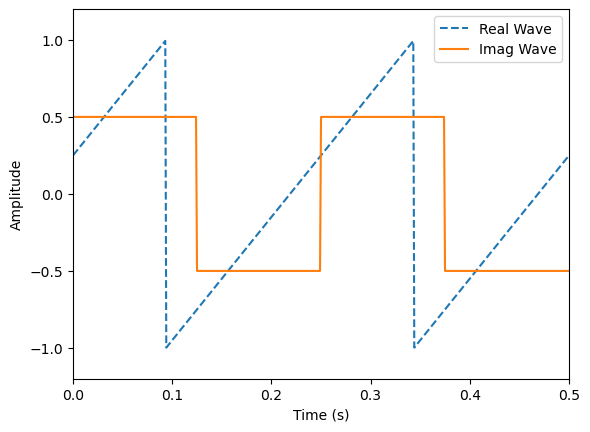

In [25]:
fs = 1e3
ts = np.arange(0, 0.5, 1/fs)
T = 1/4
x = 2*np.pi*ts/T
plt.plot(ts, np.real(complex_wave(x)), label='Real Wave', linestyle='dashed')
plt.plot(ts, np.imag(complex_wave(x)), label='Imag Wave')
plt.ylim([-1.2, 1.2])
plt.xlim([0.0, 0.5])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

The Complex Fourier Series coefficients are denoted as $c_n$, which can be computed using the integral,

$$
c_n = \frac{1}{T} \int_{-\infty}^{\infty} g(t)e^{-j2\pi f_0 nt} \, dt.
$$

The term inside the integral above can be calculated using the function below.

In [26]:
def gexp(x, g, n):
    return g(x)*np.e**(-1j*n*x)

As before for the Fourier Series, we can create functions to compute the Complex Fourier Series coefficients and summation. Also, we have introduced functions that extract the real and imaginary components from the `gexp` function above.

In [27]:
def real_gexp(x, g, n):
    return np.real(gexp(x, g, n))

def imag_gexp(x, g, n):
    return np.imag(gexp(x, g, n))

def complex_fourier_coeffs(x, g, n, a=-np.pi, b=np.pi):
    an, bn = np.zeros(2*n+1), np.zeros(2*n+1)
    for i in range(-n, n+1):
        an[i+n]=integrate.quad(real_gexp, a, b, args=(g, i))[0]/(b-a)
        bn[i+n]=integrate.quad(imag_gexp, a, b, args=(g, i))[0]/(b-a)
    cn = an + 1j*bn
    return cn

def complex_fourier_sum(x, cn):
    n = int(np.ceil(len(cn)/2))-1
    s = np.zeros(len(x), dtype=complex)
    for i in range(-n, n+1):
        s += (cn[i+n]) * np.e**(1j*x*i)
    return s

Now, we can compute the Complex Fourier Series coefficients for the complex waveform. The code cell below computes the first 9 terms and plots the final summation for inspection.

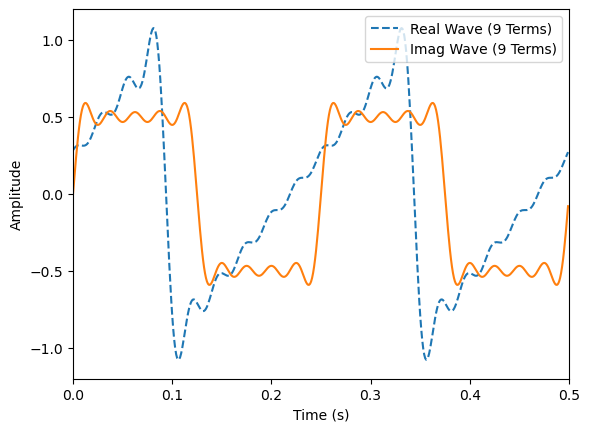

In [28]:
n = 9
cn = complex_fourier_coeffs(x, complex_wave, n)
s = complex_fourier_sum(x, cn)
plt.plot(ts, np.real(s), label='Real Wave (9 Terms)', linestyle='dashed')
plt.plot(ts, np.imag(s), label='Imag Wave (9 Terms)')
plt.ylim([-1.2, 1.2])
plt.xlim([0.0, 0.5])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

You can clearly see the sawtooth wave and square wave approximations. The Complex Fourier Series reduces the difficulty of decomposing complex waveforms into a sum of harmonically related sine and cosine waves. 

[⬅️ Previous Notebook](04_digital_filter_design.ipynb) || [Next Notebook 🚀](06_investigating_the_dft.ipynb)
